In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "/Users/endriasa//Projects/FYS4150/src/Project3/Codes/Results/"
FIGURE_ID = "Results/Figures"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", dpi=100,pad_inches=0.0,transparent=False, bbox_inches='tight',format='png')

# Earth-Sun Two Body Problem

In [ ]:
filename1  = "earth_euler_case1_50_3.txt"              
file_path1 = PROJECT_ROOT_DIR + filename1   
filename2  = "earth_verlet_case1_50_3.txt"              
file_path2 = PROJECT_ROOT_DIR + filename2  
      
data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
        
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=50, color='blue', linewidth=1,marker='o',label='Earth')
ax.scatter([0], [0], [0], color="#d6c200", s=500,label='Sun')
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.legend(loc='best',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(-3,3)
plt.ylim(-3,3)
fig.tight_layout()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(data2[:, 1], data2[:, 2], data2[:, 3],s=50, color='blue', linewidth=1,marker='o',label='Earth')
ax.scatter([0], [0], [0], color="#d6c200", s=500,label='Sun')
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.legend(loc='best',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(-3,3)
plt.ylim(-3,3)
fig.tight_layout()
save_fig('sun-earth-orbit')
plt.show()

In [ ]:
psize     = ("2","3","4","5","6","7")
filename1 = "earth_euler_case1_1"    
filename2 = "earth_verlet_case1_1" 

axx  = np.logspace(-2,-7,6)
Dat1 = np.zeros((6,1))
Dat2 = np.zeros((6,1))
j    = 0

for ii in psize:

    file_path1 = PROJECT_ROOT_DIR + filename1 + "_{}.txt".format(ii)  
    file_path2 = PROJECT_ROOT_DIR + filename2 + "_{}.txt".format(ii) 
    data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
    data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1)       

    in1  = np.where(data1[:,0] == 1)
    in1  = in1[0][0]
    dd1  = np.array(data1)
    ddo1 = dd1[0,1::]
    ddx1 = dd1[in1,1::]
    dat1 = np.sqrt(np.sum((ddx1-ddo1)**2,axis=0))
    
    in2  = np.where(data2[:,0] == 1)
    in2  = in2[0][0]
    dd2  = np.array(data2)
    ddo2 = dd2[0,1::]
    ddx2 = dd2[in1,1::]
    dat2 = np.sqrt(np.sum((ddx2-ddo2)**2,axis=0))
    
    Dat1[j,] = dat1
    Dat2[j,] = dat2
    j       += 1
    
plt.subplots(figsize = (8, 5))
plt.loglog(axx,Dat1,'r-*',markersize=15,label="Forward Euler")
plt.loglog(axx,Dat2,'k-*',markersize=15,label="Velocity Verlet")
plt.xlabel(r"$\Delta$t [yr]", fontname = "serif", fontsize = 15)
plt.ylabel("Deviation [AU]", fontname = "serif", fontsize = 15)
plt.xlim(1e-8,1e-1)
plt.ylim(1e-11,1e2)
plt.legend(loc='upper left', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Deviation_euler_verlet')
plt.show()


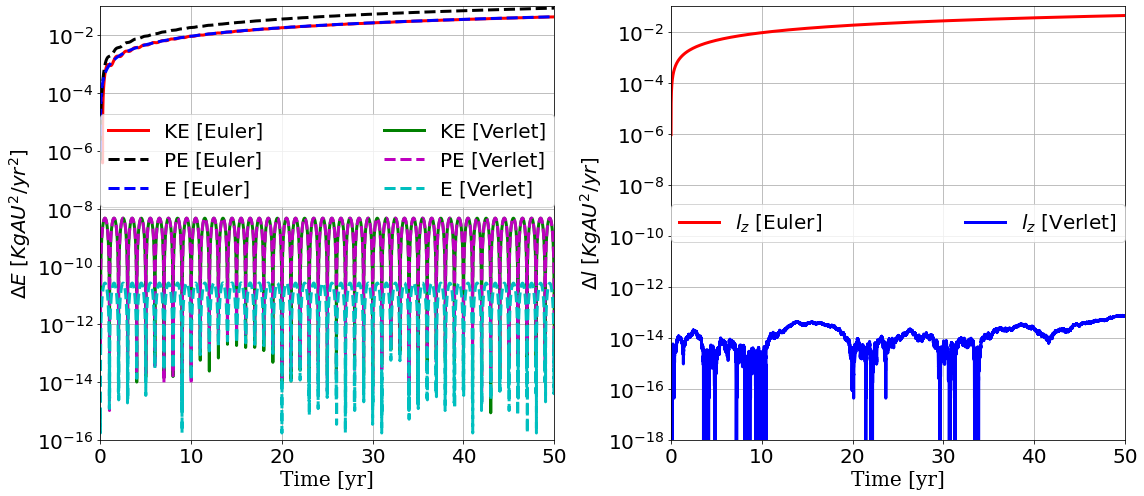

In [59]:
filename1 = "eulerEnergy.txt"    
filename2 = "verletEnergy.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 0)  
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 0)    


tim = data1[1::,0]
KEE = 1e-26*np.abs(data1[1::,1] - data1[0,1])
PEE = 1e-26*np.abs(data1[1::,2] - data1[0,2])
EE  = 1e-26*np.abs(data1[1::,3] - data1[0,3])

KEV = 1e-26*np.abs(data2[1::,1] - data2[0,1])
PEV = 1e-26*np.abs(data2[1::,2] - data2[0,2])
EV  = 1e-26*np.abs(data2[1::,3] - data2[0,3])

filename3 = "eulerAngmom.txt"    
filename4 = "verletAngmom.txt" 

file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
data3      = np.loadtxt(file_path3, dtype = np.float64, skiprows = 0)  
data4      = np.loadtxt(file_path4, dtype = np.float64, skiprows = 0)    


timm = data3[1::,0]
lze  = 1e-26*np.abs(data3[1::,3] - data3[0,3])
lzv  = 1e-26*np.abs(data4[1::,3] - data4[0,3])

plt.subplots(figsize = (16, 7))
ax = plt.subplot(1, 2, 1)
plt.semilogy(tim[::1],KEE[::1],'r-',markersize=5,label="KE [Euler]",linewidth=3)
plt.semilogy(tim[::1],PEE[::1],'k--',markersize=5,label="PE [Euler]",linewidth=3)
plt.semilogy(tim[::1],EE[::1],'b--',markersize=5,label="E [Euler]",linewidth=3)
plt.semilogy(tim[::1],KEV[::1],'g-',markersize=5,label="KE [Verlet]",linewidth=3)
plt.semilogy(tim[::1],PEV[::1],'m--',markersize=5,label="PE [Verlet]",linewidth=3)
plt.semilogy(tim[::1],EV[::1],'c--',markersize=5,label="E [Verlet]",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta E$ $[KgAU^2/yr^2]$", fontname = "serif", fontsize = 20)
plt.legend(loc='lower left', fontsize = 20)
plt.legend(bbox_to_anchor=(0., 0.65, 1., .102),loc='upper right',ncol=2, 
           mode="expand", borderaxespad=0., fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,50)
plt.ylim(1e-16,1e-1)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
plt.semilogy(timm[::1],lze[::1],'r-',markersize=5,label=r"$l_z$ [Euler]",linewidth=3)
plt.semilogy(timm[::1],lzv[::1],'b-',markersize=5,label=r"$l_z$ [Verlet]",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta l$ $[KgAU^2/yr]$", fontname = "serif", fontsize = 20)
plt.legend(loc='best',ncol=2, 
           mode="expand", borderaxespad=0., fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1e-18,1e-1)
plt.xlim(0,50)
plt.tight_layout()
plt.grid()
save_fig('Energy_Angmom_euler_verlet_circle')
plt.show()

In [ ]:
filename1 = "eulerTime.txt"    
filename2 = "verletTime.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 0)  
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 0)    

data1 = np.mean(data1.reshape(10,6),axis=0)
data2 = np.mean(data2.reshape(10,6),axis=0)
tim = np.array([1e-2,1e-3,1e-4,1e-5,1e-6,1e-7])

ax = plt.subplots(figsize = (8, 5))
plt.loglog(tim,data1,'r-o',markersize=5,label="Euler",linewidth=3)
plt.loglog(tim,data2,'b--o',markersize=5,label="Verlet",linewidth=3)
plt.xlabel(r"$\Delta$t [yr]", fontname = "serif", fontsize = 15)
plt.ylabel("CPU Time [s]", fontname = "serif", fontsize = 15)
plt.legend(loc='lower left', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(8e-8,2e-2)
plt.grid()
save_fig('Time_euler_verlet')
plt.show()


In [ ]:
filename1 = "earth_verlet_case1_2.000000_10_5.txt"    
filename2 = "earth_verlet_case1_2.010000_10_5.txt" 
filename3 = "earth_verlet_case1_2.500000_10_5.txt" 
filename4 = "earth_verlet_case1_2.950000_10_5.txt" 
filename5 = "earth_verlet_case1_3.000000_10_5.txt" 

filename1e = "earth_verlet_case11_2.000000_10_5.txt"    
filename2e = "earth_verlet_case11_2.010000_10_5.txt" 
filename3e = "earth_verlet_case11_2.500000_10_5.txt" 
filename4e = "earth_verlet_case11_2.950000_10_5.txt" 
filename5e = "earth_verlet_case11_3.000000_10_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5

file_path1e = PROJECT_ROOT_DIR + filename1e
file_path2e = PROJECT_ROOT_DIR + filename2e
file_path3e = PROJECT_ROOT_DIR + filename3e
file_path4e = PROJECT_ROOT_DIR + filename4e
file_path5e = PROJECT_ROOT_DIR + filename5e

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1) 
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 

data1e = np.loadtxt(file_path1e, dtype = np.float64, skiprows = 1)  
data2e = np.loadtxt(file_path2e, dtype = np.float64, skiprows = 1) 
data3e = np.loadtxt(file_path3e, dtype = np.float64, skiprows = 1) 
data4e = np.loadtxt(file_path4e, dtype = np.float64, skiprows = 1) 
data5e = np.loadtxt(file_path5e, dtype = np.float64, skiprows = 1) 

plt.subplots(figsize = (13, 7.5))
ax = plt.subplot(1, 2, 1)
plt.plot(data2[:, 1], data2[:, 2], label=r"$\beta = 2.01$",color = 'b',linewidth=3)
plt.plot(data1[:, 1], data1[:, 2], label=r"$\beta = 2.0$",color = 'r',linewidth=3)
plt.plot(data3[:, 1], data3[:, 2], label=r"$\beta = 2.5$",color = 'g',linewidth=3)
plt.plot(data4[:, 1], data4[:, 2], label=r"$\beta = 2.95$",color = 'k',linewidth=3)
plt.plot(data5[:, 1], data5[:, 2], label=r"$\beta = 3$",color = 'c',linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
sun = plt.Circle((0.0, 0.0), 0.1, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0., fontsize = 20)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
plt.plot(data2e[:, 1], data2e[:, 2], label=r"$\beta = 2.01$",color = 'b',linewidth=3)
plt.plot(data1e[:, 1], data1e[:, 2], label=r"$\beta = 2.0$",color = 'r',linewidth=3)
plt.plot(data3e[:, 1], data3e[:, 2], label=r"$\beta = 2.5$",color = 'g',linewidth=3)
plt.plot(data4e[:, 1], data4e[:, 2], label=r"$\beta = 2.95$",color = 'k',linewidth=3)
plt.plot(data5e[:, 1], data5e[:, 2], label=r"$\beta = 3$",color = 'c',linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
sun = plt.Circle((0.0, 0.0), 0.1, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, 
           mode="expand", borderaxespad=0., fontsize = 20)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid()
plt.tight_layout()
save_fig('ModG_euler_verlet')
plt.show()

In [ ]:
filename1 = "earth_verlet_case1_2.000000_10_5.txt"    
filename2 = "earth_verlet_case1_2.010000_10_5.txt" 
filename3 = "earth_verlet_case1_2.500000_10_5.txt" 
filename4 = "earth_verlet_case1_2.950000_10_5.txt" 
filename5 = "earth_verlet_case1_3.000000_10_5.txt" 

filename1e = "earth_verlet_case11_2.000000_10_5.txt"    
filename2e = "earth_verlet_case11_2.010000_10_5.txt" 
filename3e = "earth_verlet_case11_2.500000_10_5.txt" 
filename4e = "earth_verlet_case11_2.950000_10_5.txt" 
filename5e = "earth_verlet_case11_3.000000_10_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5

file_path1e = PROJECT_ROOT_DIR + filename1e
file_path2e = PROJECT_ROOT_DIR + filename2e
file_path3e = PROJECT_ROOT_DIR + filename3e
file_path4e = PROJECT_ROOT_DIR + filename4e
file_path5e = PROJECT_ROOT_DIR + filename5e

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1) 
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 

data1e = np.loadtxt(file_path1e, dtype = np.float64, skiprows = 1)  
data2e = np.loadtxt(file_path2e, dtype = np.float64, skiprows = 1) 
data3e = np.loadtxt(file_path3e, dtype = np.float64, skiprows = 1) 
data4e = np.loadtxt(file_path4e, dtype = np.float64, skiprows = 1) 
data5e = np.loadtxt(file_path5e, dtype = np.float64, skiprows = 1) 

fig = plt.figure(figsize=(25, 11))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(data2[:, 1], data2[:, 2], data2[:, 3],s=30, color='b', linewidth=6,marker='.',label=r"$\beta = 2.01$")
ax.scatter([0], [0], [0], color="#d6c200", s=500,label='Sun')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=30, color='r', linewidth=6,marker='.',label=r"$\beta = 2.0$")
ax.scatter(data3[:, 1], data3[:, 2], data3[:, 3],s=30, color='g', linewidth=6,marker='.',label=r"$\beta = 2.5$")
ax.scatter(data4[:, 1], data4[:, 2], data4[:, 3],s=30, color='k', linewidth=6,marker='.',label=r"$\beta = 2.95$")
ax.scatter(data5[:, 1], data5[:, 2], data5[:, 3],s=30, color='c', linewidth=6,marker='.',label=r"$\beta = 3.0$")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(bbox_to_anchor=(0., 0.8, 1., .102), loc='lower left',ncol=2, 
           mode="expand", borderaxespad=0., fontsize = 30)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid()
plt.tight_layout()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(data2e[:, 1], data2e[:, 2], data2e[:, 3], s=30, color='b', linewidth=6,marker='.',label=r"$\beta = 2.01$")
ax.scatter([0], [0], [0], color="#d6c200", s=500,label='Sun')
ax.scatter(data1e[:, 1], data1e[:, 2], data1e[:, 3],s=30, color='r', linewidth=6,marker='.',label=r"$\beta = 2.0$")
ax.scatter(data3e[:, 1], data3e[:, 2], data3e[:, 3],s=30, color='g', linewidth=6,marker='.',label=r"$\beta = 2.5$")
ax.scatter(data4e[:, 1], data4e[:, 2], data4e[:, 3],s=30, color='k', linewidth=6,marker='.',label=r"$\beta = 2.95$")
ax.scatter(data5e[:, 1], data5e[:, 2], data5e[:, 3],s=30, color='c', linewidth=6,marker='.',label=r"$\beta = 3.0$")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(bbox_to_anchor=(0., 0.8, 1., .102), loc='lower left',ncol=2, 
           mode="expand", borderaxespad=0., fontsize = 30)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid()
plt.tight_layout()
save_fig('ModG_euler_verlet')
plt.show()

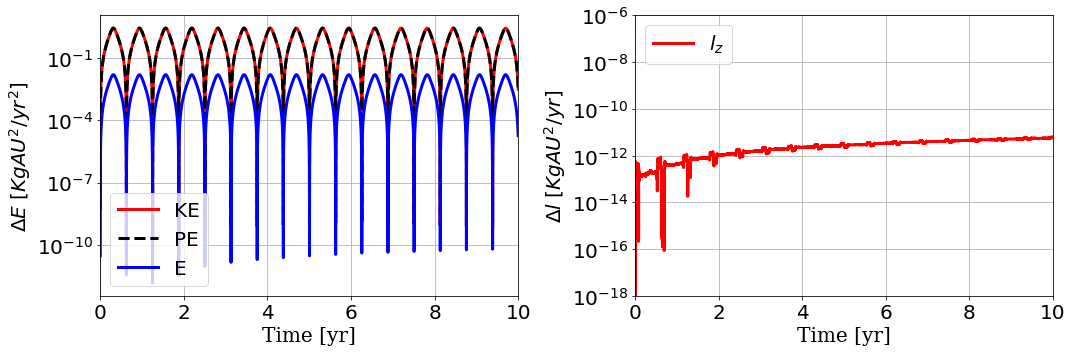

In [60]:
filename1 = "Ellipse_2.0_verletEnergy.txt" 
filename2 = "Ellipse_2.0_verletAngmom.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 0)  
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 0)    


tim = data1[1::,0]
KEE = 1e-26*np.abs(data1[1::,1] - data1[0,1])
PEE = 1e-26*np.abs(data1[1::,2] - data1[0,2])
EE  = 1e-26*np.abs(data1[1::,3] - data1[0,3])

tim = data2[1::,0]
lzv = 1e-26*np.abs(data2[1::,3] - data2[0,3])

plt.subplots(figsize = (15, 5))
ax = plt.subplot(1, 2, 1)
plt.semilogy(tim[::1],KEE[::1],'r-',markersize=5,label="KE",linewidth=3)
plt.semilogy(tim[::1],PEE[::1],'k--',markersize=5,label="PE",linewidth=3)
plt.semilogy(tim[::1],EE[::1],'b',markersize=5,label="E",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta E$ $[KgAU^2/yr^2]$", fontname = "serif", fontsize = 20)
plt.legend(loc='lower left', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,10)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
plt.semilogy(tim,lzv,'r-',markersize=5,label=r"$l_z$",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta l$ $[KgAU^2/yr]$", fontname = "serif", fontsize = 20)
plt.legend(loc='upper left', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1e-18,1e-6)
plt.xlim(0,10)
plt.grid()
plt.tight_layout()
save_fig('Energy_Angmom_verlet_ellipse')
plt.show()

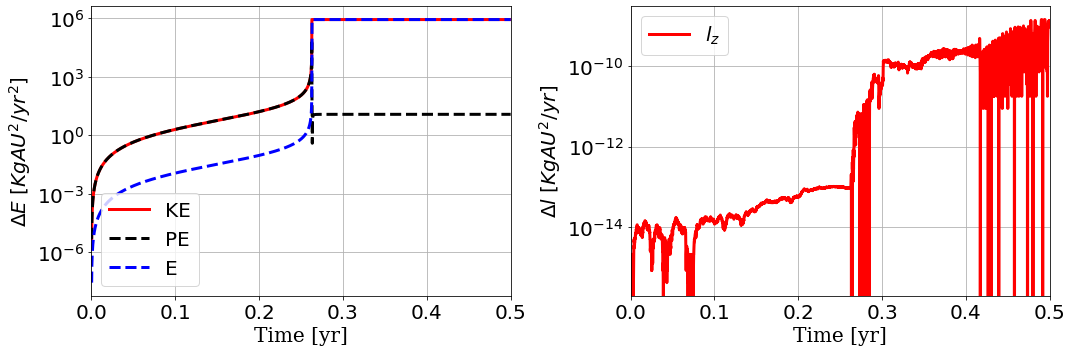

In [61]:
filename1 = "Ellipse_3.0_verletEnergy.txt" 
filename2 = "Ellipse_3.0_verletAngmom.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 0)  
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 0)    


tim = data1[1::,0]
KEE = 1e-25*np.abs(data1[1::,1] - data1[0,1])
PEE = 1e-25*np.abs(data1[1::,2] - data1[0,2])
EE  = 1e-25*np.abs(data1[1::,3] - data1[0,3])

tim = data2[1::,0]
lzv = 1e-25*np.abs(data2[1::,3] - data2[0,3])

plt.subplots(figsize = (15, 5))
ax = plt.subplot(1, 2, 1)
plt.semilogy(tim[::1],KEE[::1],'r-',markersize=5,label="KE",linewidth=3)
plt.semilogy(tim[::1],PEE[::1],'k--',markersize=5,label="PE",linewidth=3)
plt.semilogy(tim[::1],EE[::1],'b--',markersize=5,label="E",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta E$ $[KgAU^2/yr^2]$", fontname = "serif", fontsize = 20)
plt.legend(loc='lower left', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,0.5)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
plt.semilogy(tim,lzv,'r-',markersize=5,label=r"$l_z$",linewidth=3)
plt.xlabel(r"Time [yr]", fontname = "serif", fontsize = 20)
plt.ylabel(r"$\Delta l$ $[KgAU^2/yr]$", fontname = "serif", fontsize = 20)
plt.legend(loc='best', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.ylim(1e-18,1e-6)
plt.xlim(0,0.5)
plt.grid()
plt.tight_layout()
save_fig('Energy_Angmom_verlet_ellipse_beta3')
plt.show()

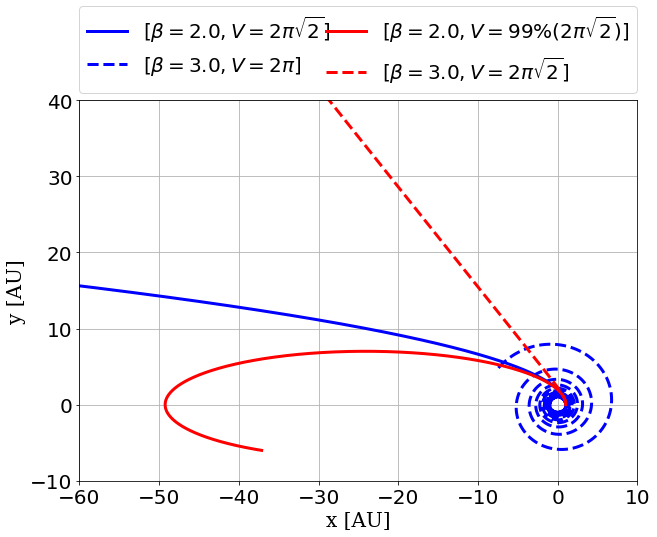

In [37]:
filename1 = "earth_verlet_case111_2.000000_100_5.txt"    
filename2 = "earth_verlet_case111c_3.000000_100_5.txt" 
filename3 = "earth_verlet_case111b_2.000000_100_5.txt"    
filename4 = "earth_verlet_case111d_3.000000_100_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 

fig,ax=plt.subplots(figsize = (10, 7))
#ax.set_aspect("equal")
#ax = plt.subplot(1, 2, 1)
plt.plot(data1[:, 1], data1[:, 2],'b', label=r"$[\beta = 2.0, V=2\pi\sqrt{2}]$",linewidth=3)
plt.plot(data2[:, 1], data2[:, 2],'b--', label=r"$[\beta = 3.0, V=2\pi]$",linewidth=3)
plt.plot(data3[:, 1], data3[:, 2],'r', label=r"$[\beta = 2.0, V=99\%(2\pi\sqrt{2})]$",linewidth=3)
plt.plot(data4[:, 1], data4[:, 2],'r--', label=r"$[\beta = 3.0, V=2\pi\sqrt{2}]$",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
#sun = plt.Circle((0.0, 0.0), 0.4, fc = "#d6c200")   
#ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 20)
plt.grid()
plt.xlim(-60,10)
plt.ylim(-10,40)
save_fig('Escape_Velocity')
plt.show()

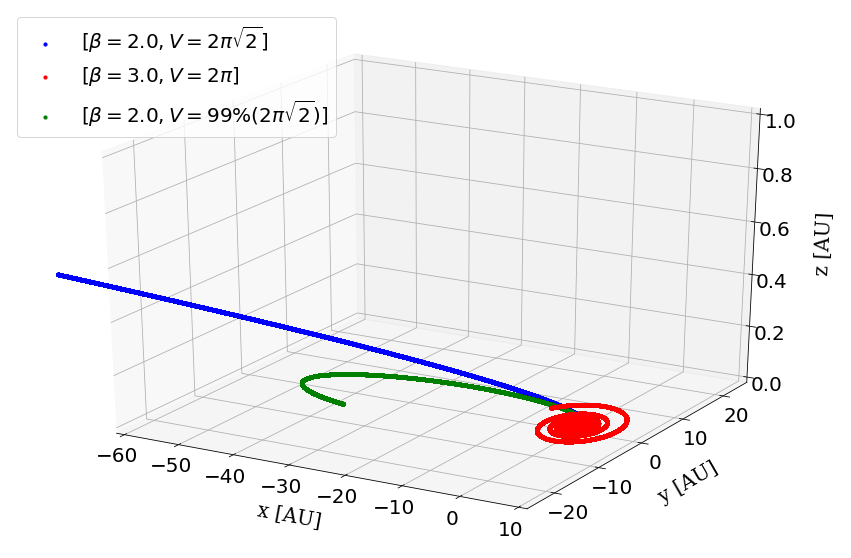

In [46]:
filename1 = "earth_verlet_case111_2.000000_100_5.txt"    
filename2 = "earth_verlet_case111c_3.000000_100_5.txt" 
filename3 = "earth_verlet_case111b_2.000000_100_5.txt"    
filename4 = "earth_verlet_case111d_3.000000_100_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.scatter(0, 0, 0, color="#d6c200", s=250,label='Sun')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=10, color='b', linewidth=1,marker='o',label=r"$[\beta = 2.0, V=2\pi\sqrt{2}]$")
ax.scatter(data2[:, 1], data2[:, 2], data2[:, 3],s=10, color='r', linewidth=1,marker='o',label=r"$[\beta = 3.0, V=2\pi]$")
ax.scatter(data3[:, 1], data3[:, 2], data3[:, 3],s=10, color='g', linewidth=1,marker='o',label=r"$[\beta = 2.0, V=99\%(2\pi\sqrt{2})]$")
#ax.scatter(data4[:, 1], data4[:, 2], data4[:, 3],s=10, color='k', linewidth=1,marker='o',label=r"$[\beta = 3.0, V=2\pi\sqrt{2}]$")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 20,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 20,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 20,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc='upper left',fontsize = 20)
plt.grid()
plt.xlim(-60,10)
plt.ylim(-25,25)
ax.set_zlim(0,1)
ax.view_init(25, -60)
save_fig('Escape_Velocity')
plt.show()

# The three-body problem

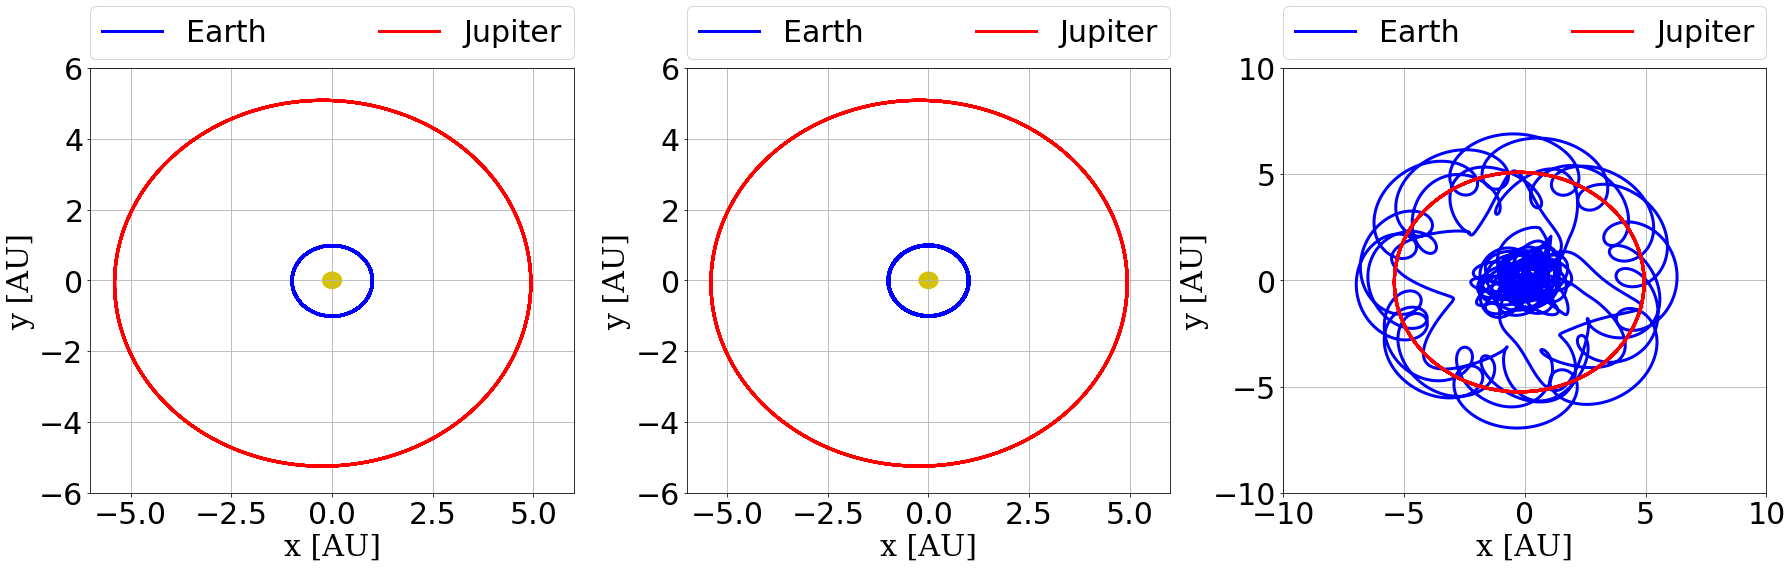

In [67]:
filename1 = "earth_verlet_case3_2.000000_100_5.txt"    
filename2 = "jupiter_verlet_case3_2.000000_100_5.txt" 
filename3 = "earth_verlet_case31_2.000000_100_5.txt"     
filename4 = "jupiter_verlet_case31_2.000000_100_5.txt" 
filename5 = "earth_verlet_case311_2.000000_100_5.txt"     
filename6 = "jupiter_verlet_case311_2.000000_100_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1)  
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 

fig,plt.subplots(figsize = (25, 8))
#ax.set_aspect("equal")
ax = plt.subplot(1, 3, 1)
plt.plot(data1[:, 1], data1[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data2[:, 1], data2[:, 2],'r', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
sun = plt.Circle((0.0, 0.0), 0.25, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 3, 2)
plt.plot(data3[:, 1], data3[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data4[:, 1], data4[:, 2],'r', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
sun = plt.Circle((0.0, 0.0), 0.25, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 3, 3)
plt.plot(data5[:, 1], data5[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data6[:, 1], data6[:, 2],'r', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
sun = plt.Circle((0.0, 0.0), 0.25, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.tight_layout()
save_fig('Threebody')
plt.show()

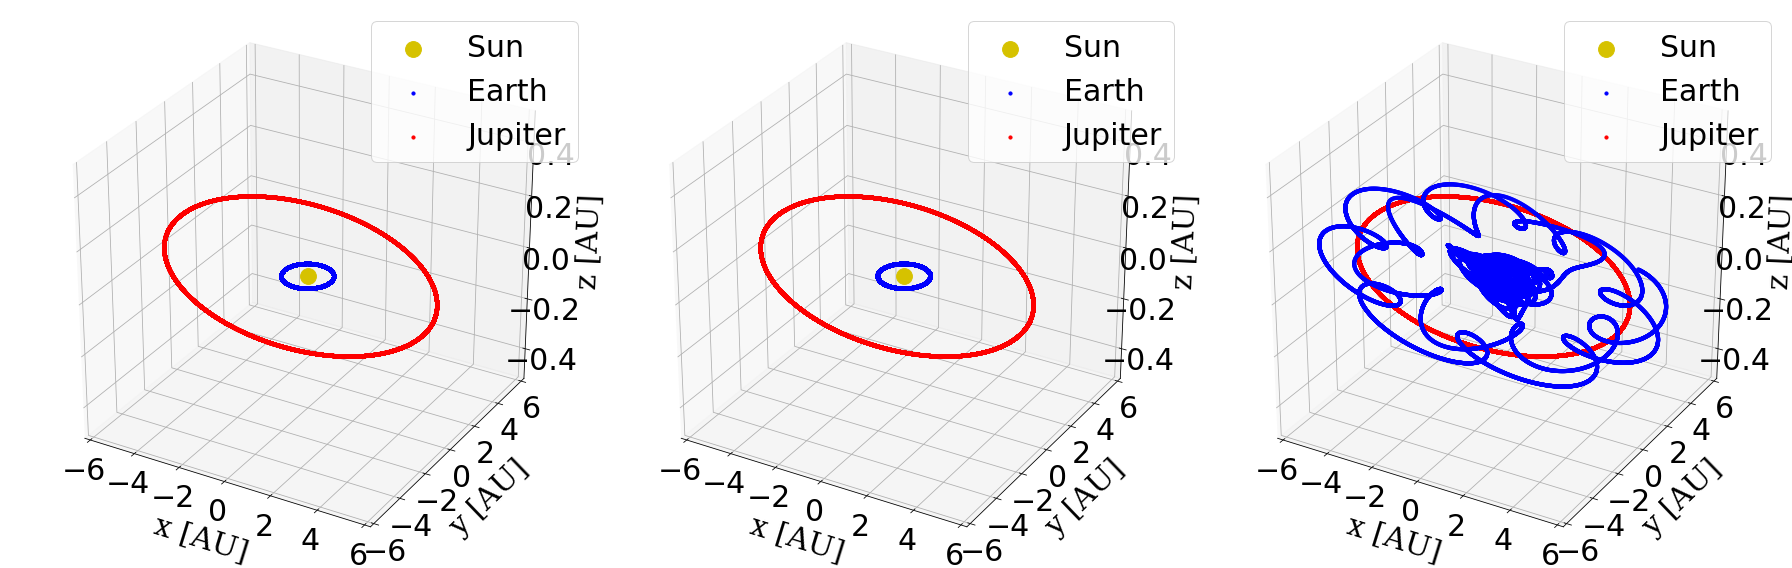

In [70]:
filename1 = "earth_verlet_case3_2.000000_50_5.txt"    
filename2 = "jupiter_verlet_case3_2.000000_50_5.txt" 
filename3 = "earth_verlet_case31_2.000000_50_5.txt"     
filename4 = "jupiter_verlet_case31_2.000000_50_5.txt" 
filename5 = "earth_verlet_case311_2.000000_50_5.txt"     
filename6 = "jupiter_verlet_case311_2.000000_50_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1) 
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1)  
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 

fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(0, 0, 0, color="#d6c200", s=250,label='Sun')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data2[:, 1], data2[:, 2], data2[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(0, 0, 0, color="#d6c200", s=250,label='Sun')
ax.scatter(data3[:, 1], data3[:, 2], data3[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data4[:, 1], data4[:, 2], data4[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(0, 0, 0, color="#d6c200", s=250,label='Sun')
ax.scatter(data5[:, 1], data5[:, 2], data5[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data6[:, 1], data6[:, 2], data6[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()
save_fig('Threebody')
plt.show()

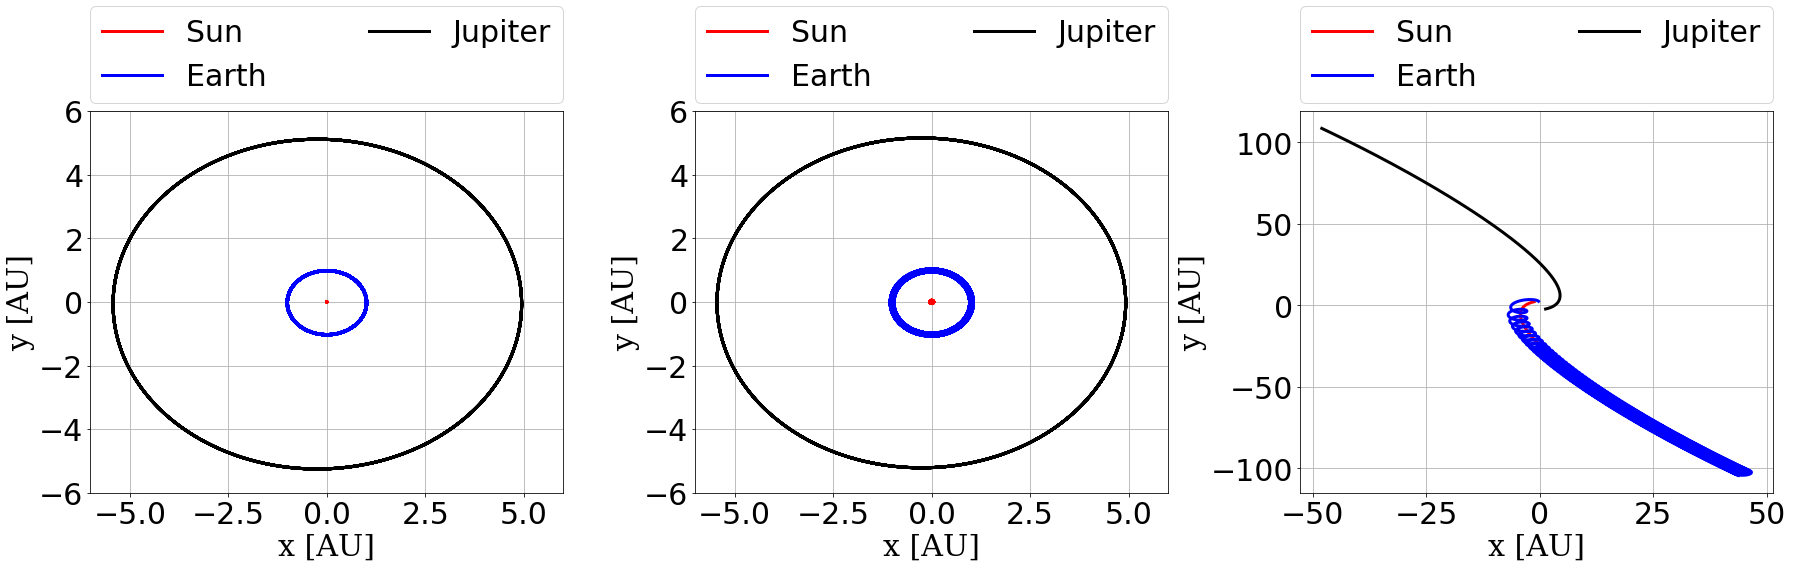

In [85]:
filename1 = "sun_verlet_case4_2.000000_100_5.txt"    
filename2 = "earth_verlet_case4_2.000000_100_5.txt" 
filename3 = "jupiter_verlet_case4_2.000000_100_5.txt"    
filename4 = "sun_verlet_case41_2.000000_100_5.txt"    
filename5 = "earth_verlet_case41_2.000000_100_5.txt" 
filename6 = "jupiter_verlet_case41_2.000000_100_5.txt" 
filename7 = "sun_verlet_case411_2.000000_250_5.txt"    
filename8 = "earth_verlet_case411_2.000000_250_5.txt" 
filename9 = "jupiter_verlet_case411_2.000000_250_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6
file_path7 = PROJECT_ROOT_DIR + filename7
file_path8 = PROJECT_ROOT_DIR + filename8
file_path9 = PROJECT_ROOT_DIR + filename9

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)  
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 
data7 = np.loadtxt(file_path7, dtype = np.float64, skiprows = 1)  
data8 = np.loadtxt(file_path8, dtype = np.float64, skiprows = 1) 
data9 = np.loadtxt(file_path9, dtype = np.float64, skiprows = 1) 

fig,plt.subplots(figsize = (25, 8))
#ax.set_aspect("equal")
ax = plt.subplot(1, 3, 1)
plt.plot(data1[:, 1], data1[:, 2],'r', label="Sun",linewidth=3)
plt.plot(data2[:, 1], data2[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data3[:, 1], data3[:, 2],'k', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 3, 2)
plt.plot(data4[:, 1], data4[:, 2],'r', label="Sun",linewidth=3)
plt.plot(data5[:, 1], data5[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data6[:, 1], data6[:, 2],'k', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.tight_layout()

ax = plt.subplot(1, 3, 3)
plt.plot(data7[:, 1], data7[:, 2],'r', label="Sun",linewidth=3)
plt.plot(data8[:, 1], data8[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data9[:, 1], data9[:, 2],'k', label="Jupiter",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 30)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 30)
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.grid()
plt.tight_layout()
save_fig('ThreebodyM')
plt.show()

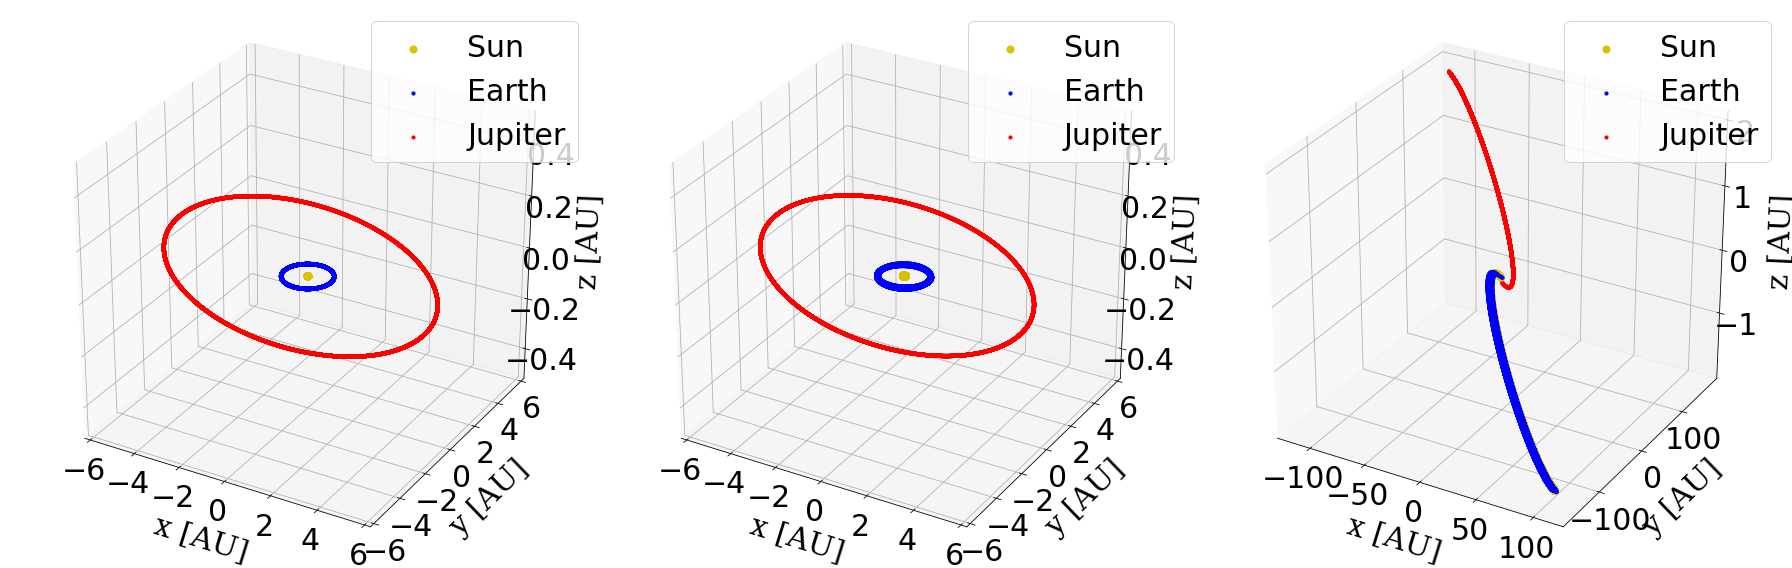

In [86]:
filename1 = "sun_verlet_case4_2.000000_1000_5.txt"    
filename2 = "earth_verlet_case4_2.000000_1000_5.txt" 
filename3 = "jupiter_verlet_case4_2.000000_1000_5.txt"    
filename4 = "sun_verlet_case41_2.000000_1000_5.txt"    
filename5 = "earth_verlet_case41_2.000000_1000_5.txt" 
filename6 = "jupiter_verlet_case41_2.000000_1000_5.txt" 
filename7 = "sun_verlet_case411_2.000000_1000_5.txt"    
filename8 = "earth_verlet_case411_2.000000_1000_5.txt" 
filename9 = "jupiter_verlet_case411_2.000000_1000_5.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6
file_path7 = PROJECT_ROOT_DIR + filename7
file_path8 = PROJECT_ROOT_DIR + filename8
file_path9 = PROJECT_ROOT_DIR + filename9

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)  
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 
data7 = np.loadtxt(file_path7, dtype = np.float64, skiprows = 1)  
data8 = np.loadtxt(file_path8, dtype = np.float64, skiprows = 1) 
data9 = np.loadtxt(file_path9, dtype = np.float64, skiprows = 1) 

fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=50, color="#d6c200", linewidth=1,marker='o',label="Sun")
ax.scatter(data2[:, 1], data2[:, 2], data2[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data3[:, 1], data3[:, 2], data3[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(data4[:, 1], data4[:, 2], data4[:, 3],s=50, color="#d6c200", linewidth=1,marker='o',label="Sun")
ax.scatter(data5[:, 1], data5[:, 2], data5[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data6[:, 1], data6[:, 2], data6[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(data7[:, 1], data7[:, 2], data7[:, 3],s=50, color="#d6c200", linewidth=1,marker='o',label="Sun")
ax.scatter(data8[:, 1], data8[:, 2], data8[:, 3],s=10, color='b', linewidth=1,marker='o',label="Earth")
ax.scatter(data9[:, 1], data9[:, 2], data9[:, 3],s=10, color='r', linewidth=1,marker='o',label="Jupiter")
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=20)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
#plt.xlim(-45,45)
#plt.ylim(-45,45)
#ax.set_zlim(-0.5,0.5)
plt.grid()
plt.tight_layout()
save_fig('ThreebodyM')
plt.show()

In [ ]:
filename1 = "Full_sun_verlet_250_5.txt"    
filename2 = "Full_mercury_verlet_250_5.txt" 
filename3 = "Full_venus_verlet_250_5.txt"    
filename4 = "Full_earth_verlet_250_5.txt"    
filename5 = "Full_mars_verlet_250_5.txt" 
filename6 = "Full_jupiter_verlet_250_5.txt" 
filename7 = "Full_saturn_verlet_250_5.txt"    
filename8 = "Full_uranus_verlet_250_5.txt" 
filename9 = "Full_neptune_verlet_250_5.txt" 
filename10 = "Full_pluto_verlet_250_5.txt"

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6
file_path7 = PROJECT_ROOT_DIR + filename7
file_path8 = PROJECT_ROOT_DIR + filename8
file_path9 = PROJECT_ROOT_DIR + filename9
file_path10 = PROJECT_ROOT_DIR + filename10

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)  
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 
data7 = np.loadtxt(file_path7, dtype = np.float64, skiprows = 1)  
data8 = np.loadtxt(file_path8, dtype = np.float64, skiprows = 1) 
data9 = np.loadtxt(file_path9, dtype = np.float64, skiprows = 1) 
data10 = np.loadtxt(file_path10, dtype = np.float64, skiprows = 1) 

fig,ax = plt.subplots(figsize = (30, 7))
ax.set_aspect("equal")
plt.subplot(1, 3, 1)
plt.plot(data1[:, 1], data1[:, 2],'y', label="Sun",linewidth=3)
plt.plot(data2[:, 1], data2[:, 2],'r', label="Mercury",linewidth=3)
plt.plot(data3[:, 1], data3[:, 2],'k', label="Venus",linewidth=3)
plt.plot(data4[:, 1], data4[:, 2],'b', label="Earth",linewidth=3)
plt.plot(data5[:, 1], data5[:, 2],'m', label="Mars",linewidth=3)
plt.plot(data6[:, 1], data6[:, 2],'c', label="Jupiter",linewidth=3)
plt.plot(data7[:, 1], data7[:, 2],'g', label="Saturn",linewidth=3)
plt.plot(data8[:, 1], data8[:, 2],'r--', label="Uranus",linewidth=3)
plt.plot(data9[:, 1], data9[:, 2],'k--', label="Neptune",linewidth=3)
plt.plot(data10[:, 1], data10[:, 2],'r', label="Pluto",linewidth=3)
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
sun = plt.Circle((0.0, 0.0), 0.1, fc = "#d6c200")   
ax.add_patch(sun)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 20)
plt.xlim(-45,45)
plt.ylim(-45,45)
plt.grid()
save_fig('Full_solar_system')
plt.show()

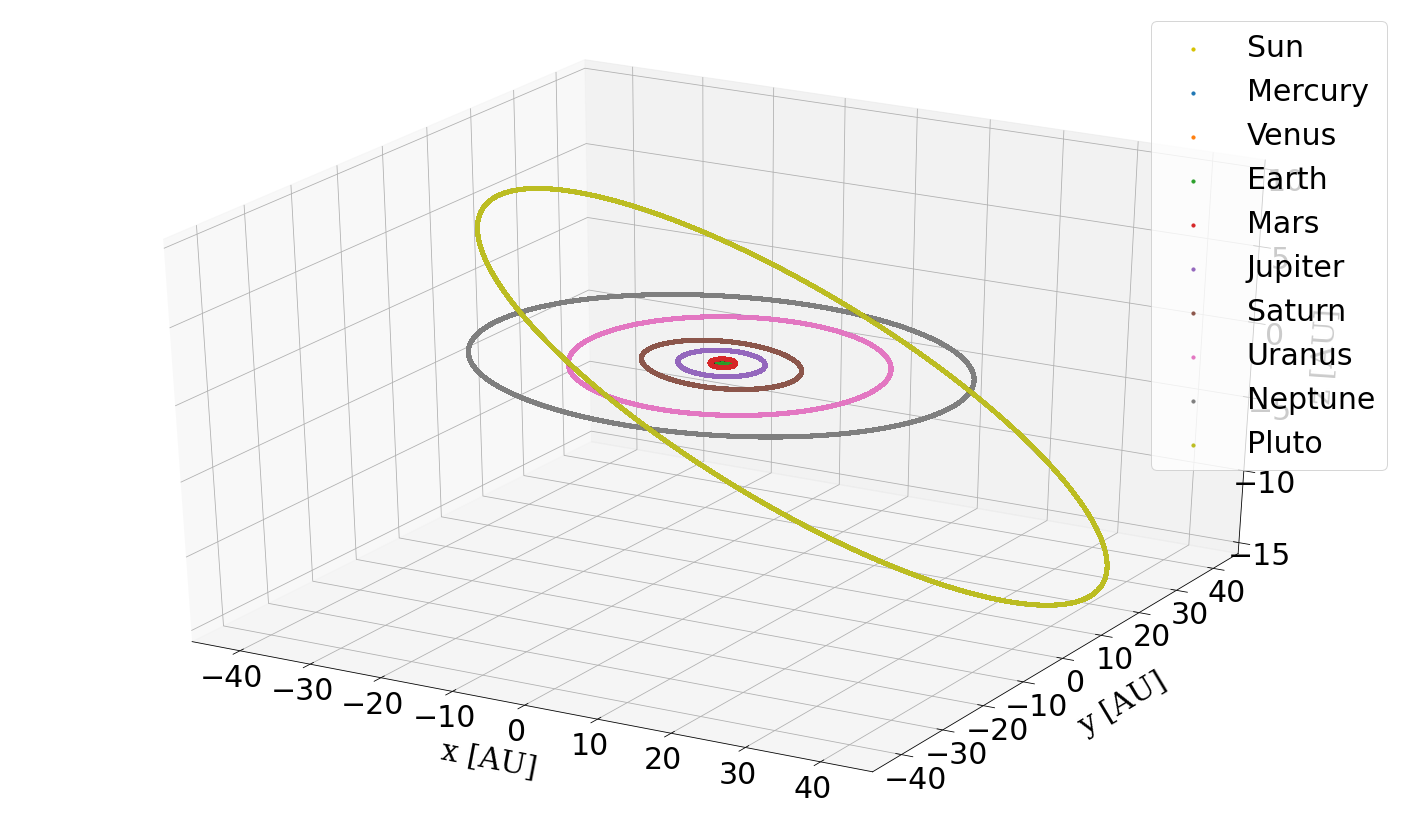

In [89]:
filename1 = "sun_verlet_case5_2.000000_250_5.txt"    
filename2 = "mercury_verlet_case5_2.000000_250_5.txt" 
filename3 = "venus_verlet_case5_2.000000_250_5.txt"    
filename4 = "earth_verlet_case5_2.000000_250_5.txt"    
filename5 = "mars_verlet_case5_2.000000_250_5.txt" 
filename6 = "jupiter_verlet_case5_2.000000_250_5.txt" 
filename7 = "saturn_verlet_case5_2.000000_250_5.txt"    
filename8 = "uranus_verlet_case5_2.000000_250_5.txt" 
filename9 = "neptune_verlet_case5_2.000000_250_5.txt" 
filename10 = "pluto_verlet_case5_2.000000_250_5.txt"

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5
file_path6 = PROJECT_ROOT_DIR + filename6
file_path7 = PROJECT_ROOT_DIR + filename7
file_path8 = PROJECT_ROOT_DIR + filename8
file_path9 = PROJECT_ROOT_DIR + filename9
file_path10 = PROJECT_ROOT_DIR + filename10

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1) 
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)  
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)  
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1) 
data6 = np.loadtxt(file_path6, dtype = np.float64, skiprows = 1) 
data7 = np.loadtxt(file_path7, dtype = np.float64, skiprows = 1)  
data8 = np.loadtxt(file_path8, dtype = np.float64, skiprows = 1) 
data9 = np.loadtxt(file_path9, dtype = np.float64, skiprows = 1) 
data10 = np.loadtxt(file_path10, dtype = np.float64, skiprows = 1) 

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(data1[:, 1], data1[:, 2], data1[:, 3],s=10, color="#d6c200", linewidth=1,marker='o',label="Sun")
ax.scatter(data2[:, 1], data2[:, 2],data2[:, 3],'r', s=10,label="Mercury",linewidth=1,marker='o')
ax.scatter(data3[:, 1], data3[:, 2],data3[:, 3],'k', s=10,label="Venus",linewidth=1,marker='o')
ax.scatter(data4[:, 1], data4[:, 2],data4[:, 3],'b', s=10,label="Earth",linewidth=1,marker='o')
ax.scatter(data5[:, 1], data5[:, 2],data5[:, 3],'m', s=10,label="Mars",linewidth=1,marker='o')
ax.scatter(data6[:, 1], data6[:, 2],data6[:, 3],'c', s=10,label="Jupiter",linewidth=1,marker='o')
ax.scatter(data7[:, 1], data7[:, 2],data7[:, 3],'g', s=10,label="Saturn",linewidth=1,marker='o')
ax.scatter(data8[:, 1], data8[:, 2],data8[:, 3],'r--', s=10,label="Uranus",linewidth=1,marker='o')
ax.scatter(data9[:, 1], data9[:, 2],data9[:, 3],'k--', s=10,label="Neptune",linewidth=1,marker='o')
ax.scatter(data10[:, 1], data10[:, 2],data10[:, 3],'r', s=10,label="Pluto",linewidth=1,marker='o')
ax.set_xlabel("x [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_ylabel("y [AU]", fontname = "serif", fontsize = 30,labelpad=30)
ax.set_zlabel("z [AU]", fontname = "serif", fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.xlim(-45,45)
plt.ylim(-45,45)
plt.grid()
save_fig('Full_solar_system')
plt.show()

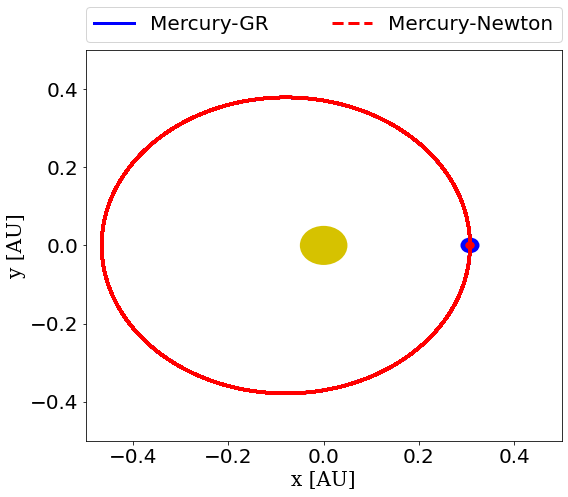

In [91]:
filename1  = "mercury_GR_verlet_GR_case6_2.000000_100_7.txt"   
filename2  = "mercury_verlet_GR_case6_2.000000_100_7.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1)

x_pGR = 0.3075 
y_pGR = 6.40972e-05
x_p   = 0.3075
y_p   = 3.63146e-07

#mercury_GR: theta_p = 42.9951,  x_p = 0.3075, y_p = 6.40972e-05
#mercury: theta_p = 0.243591,  x_p = 0.3075, y_p = 3.63146e-07
    
fig,ax = plt.subplots(figsize = (8, 7))
#ax.set_aspect("equal")
plt.plot(data1[:, 1], data1[:, 2],'b',linewidth=3,label="Mercury-GR")
plt.plot(data2[:, 1], data2[:, 2],'r--',linewidth=3,label="Mercury-Newton")
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
sun = plt.Circle((0.0, 0.0), 0.05, fc = "#d6c200")   
ax.add_patch(sun)
mercuryGR = plt.Circle((x_pGR, y_pGR), 0.02, fc = "b")   
ax.add_patch(mercuryGR)
mercury = plt.Circle((x_p, y_p), 0.01, fc = "r") 
ax.add_patch(mercury)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", 
           borderaxespad=0., fontsize = 20)
plt.tight_layout()
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
#save_fig('ModG_euler_verlet')
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


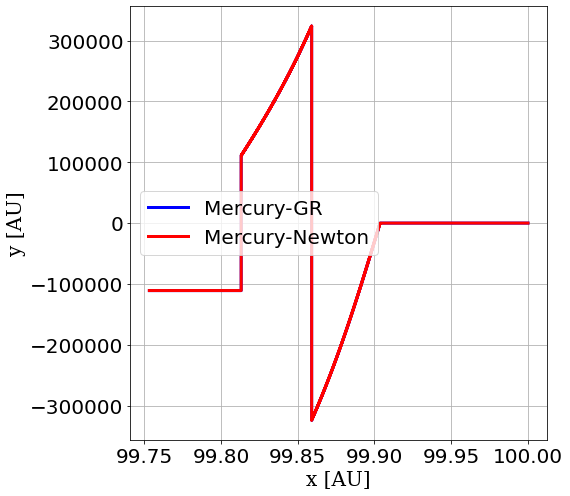

In [128]:
filename1  = "Mercury_angle"   
file_path1 = PROJECT_ROOT_DIR + filename1
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)  
tim        = data1[:,0]

fig,ax = plt.subplots(figsize = (8, 7))
#ax.set_aspect("equal")
plt.plot(tim[0::2],data1[0::2, 1],'b',linewidth=3,label="Mercury-GR")
plt.plot(tim[1::2],data1[1::2, 1],'r',linewidth=3,label="Mercury-Newton")
plt.xlabel("x [AU]", fontname = "serif", fontsize = 20)
plt.ylabel("y [AU]", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize = 20)
plt.grid()
plt.tight_layout()
plt.xlim(99.91,100)
plt.ylim(0,44)
save_fig('Mercury')
plt.show()